# THE STANFORD OPEN POLICING PROJECT ANALYSIS: 
## On a typical day in the United States, police officers make more than 50,000 traffic stops. 

In [46]:
import pandas as pd
df=pd.read_csv('D:\CSV\police.csv')
print(df.head())

  state   stop_date stop_time  county_name driver_gender driver_race  \
0    RI  2005-01-04     12:55          NaN             M       White   
1    RI  2005-01-23     23:15          NaN             M       White   
2    RI  2005-02-17     04:15          NaN             M       White   
3    RI  2005-02-20     17:15          NaN             M       White   
4    RI  2005-02-24     01:20          NaN             F       White   

                    violation_raw  violation  search_conducted search_type  \
0  Equipment/Inspection Violation  Equipment             False         NaN   
1                        Speeding   Speeding             False         NaN   
2                        Speeding   Speeding             False         NaN   
3                Call for Service      Other             False         NaN   
4                        Speeding   Speeding             False         NaN   

    stop_outcome is_arrested stop_duration  drugs_related_stop district  
0       Citation       F

In [47]:
df.shape

(91741, 15)

In [48]:
df.isnull().sum()

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

In [49]:
# dataset is about Rhod Island(RI) so we can remove country column
df.drop(["county_name"], axis=1, inplace=True)

### Set of Questions we can ask:
1. how many years data was recorded
2. which gender driver was driving vehicle the most wrt their age and race
3. which type of voilation was seen most and wht was the outcome(arrested?)
4. stop duration vs driver race and, wht was stop outcome, how many drug related stop?
5. normalisation required?
<!-- outliers
correlation
covariance  -->

5. Do the gender commit diff violations?
6. Most common stop_outcome?

In [50]:
# df.dropna(subset=['driver_gender'], inplace=True)
# should i drop it?

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   state               91741 non-null  object
 1   stop_date           91741 non-null  object
 2   stop_time           91741 non-null  object
 3   driver_gender       86536 non-null  object
 4   driver_race         86539 non-null  object
 5   violation_raw       86539 non-null  object
 6   violation           86539 non-null  object
 7   search_conducted    91741 non-null  bool  
 8   search_type         3307 non-null   object
 9   stop_outcome        86539 non-null  object
 10  is_arrested         86539 non-null  object
 11  stop_duration       86539 non-null  object
 12  drugs_related_stop  91741 non-null  bool  
 13  district            91741 non-null  object
dtypes: bool(2), object(12)
memory usage: 8.6+ MB


In [51]:
# convert date column
# should i index year column?
# driver_gender can be label encoded
# take out driver_ages from driver_age_raw column(year data was recorded is 2005), after tht column not needed
# is_arrested dtype convert to bool
# stop_duration?
#femal vs male violation stacked chart?

In [52]:
df['is_arrested'].dtype

dtype('O')

In [53]:
df.is_arrested.value_counts(dropna=False)

False    83461
NaN       5202
True      3078
Name: is_arrested, dtype: int64

In [54]:
df['is_arrested']= df.is_arrested.astype('bool') #overwritted series
df['is_arrested'].dtype

dtype('bool')

In [55]:
df.is_arrested.value_counts(dropna=False)

False    83461
True      8280
Name: is_arrested, dtype: int64

In [56]:
df.stop_duration.value_counts(dropna=False)

0-15 Min     69579
16-30 Min    13740
NaN           5202
30+ Min       3220
Name: stop_duration, dtype: int64

In [57]:
# combining all dateTime columns into 1 column and convert to tht format
df.stop_date.str.replace('/', '-')
# print(df.head())
combined= df.stop_date.str.cat(df.stop_time, sep=' ')
combined

0        2005-01-04 12:55
1        2005-01-23 23:15
2        2005-02-17 04:15
3        2005-02-20 17:15
4        2005-02-24 01:20
               ...       
91736    2015-12-31 21:21
91737    2015-12-31 21:59
91738    2015-12-31 22:04
91739    2015-12-31 22:09
91740    2015-12-31 22:47
Name: stop_date, Length: 91741, dtype: object

In [58]:
df['stop_date_time']= pd.to_datetime(combined)
df.head()

,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,stop_date_time
0,RI,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,2005-01-04 12:55:00
1,RI,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,2005-01-23 23:15:00
2,RI,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,2005-02-17 04:15:00
3,RI,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,2005-02-20 17:15:00
4,RI,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,2005-02-24 01:20:00


In [59]:
df.set_index('stop_date_time', inplace=True)
df.index[:5]

DatetimeIndex(['2005-01-04 12:55:00', '2005-01-23 23:15:00',
               '2005-02-17 04:15:00', '2005-02-20 17:15:00',
               '2005-02-24 01:20:00'],
              dtype='datetime64[ns]', name='stop_date_time', freq=None)

 Most common stop_outcome?

In [60]:
df.stop_outcome.value_counts()

Citation            77092
Warning              5137
Arrest Driver        2735
No Action             625
N/D                   607
Arrest Passenger      343
Name: stop_outcome, dtype: int64

In [61]:
df.stop_outcome.value_counts(normalize=True)

Citation            0.890835
Warning             0.059361
Arrest Driver       0.031604
No Action           0.007222
N/D                 0.007014
Arrest Passenger    0.003964
Name: stop_outcome, dtype: float64

In [62]:
df.violation.value_counts(normalize=True)

Speeding               0.559563
Moving violation       0.187476
Equipment              0.126209
Other                  0.050960
Registration/plates    0.042790
Seat belt              0.033002
Name: violation, dtype: float64

#### INSIGHT: More than half of all violations are for speeding, followed by other moving violations and equipment violations.

Most common driver_race?

In [63]:
df.driver_race.value_counts()

White       61872
Black       12285
Hispanic     9727
Asian        2390
Other         265
Name: driver_race, dtype: int64

'White' driver_race stop_outcome's proportions?

In [64]:
white= df[df.driver_race=='White']
print(white.shape)
white.stop_outcome.value_counts(normalize=True)

(61872, 14)


Citation            0.902234
Warning             0.057522
Arrest Driver       0.024017
No Action           0.007047
N/D                 0.006433
Arrest Passenger    0.002748
Name: stop_outcome, dtype: float64

'Black' driver_race stop_outcome's proportions?

In [65]:
black= df[df.driver_race=='Black']
print(black.shape)
black.stop_outcome.value_counts(normalize=True)

(12285, 14)


Citation            0.857224
Warning             0.065120
Arrest Driver       0.054294
N/D                 0.008547
Arrest Passenger    0.008303
No Action           0.006512
Name: stop_outcome, dtype: float64

Do the gender commit diff violations?

In [66]:
# Create a DataFrame of female drivers
female = df[df['driver_gender']=='F']

# Create a DataFrame of male drivers
male = df[df['driver_gender']=='M']

# Compute the violations by female drivers (as proportions)
print("Female: ", female["violation"].value_counts(normalize=True))

# Compute the violations by male drivers (as proportions)
print("Male: ", male["violation"].value_counts(normalize=True))

Female:  Speeding               0.658114
Moving violation       0.138218
Equipment              0.105199
Registration/plates    0.044418
Other                  0.029738
Seat belt              0.024312
Name: violation, dtype: float64
Male:  Speeding               0.522243
Moving violation       0.206144
Equipment              0.134158
Other                  0.058985
Registration/plates    0.042175
Seat belt              0.036296
Name: violation, dtype: float64


In [67]:
#visualize

#### INSIGHT: About two-thirds of female traffic stops are for speeding, whereas stops of males are more balanced among the six categories. This doesn't mean that females speed more often than males, however, since we didn't take into account the number of stops or drivers.

Does gender affect who does get the ticket for speeding?

In [68]:
# Create a DataFrame of female drivers stopped for speeding
female_and_speeding = df[(df.driver_gender=="F") & (df.violation=='Speeding')]

# Create a DataFrame of male drivers stopped for speeding
male_and_speeding = df[(df.driver_gender=='M') & (df.violation=='Speeding')]

# Compute the stop outcomes for female drivers (as proportions)
print(female_and_speeding["stop_outcome"].value_counts(normalize=True))

# Compute the stop outcomes for male drivers (as proportions)
print(male_and_speeding["stop_outcome"].value_counts(normalize=True))

Citation            0.952192
Warning             0.040074
Arrest Driver       0.005752
N/D                 0.000959
Arrest Passenger    0.000639
No Action           0.000383
Name: stop_outcome, dtype: float64
Citation            0.944595
Warning             0.036184
Arrest Driver       0.015895
Arrest Passenger    0.001281
No Action           0.001068
N/D                 0.000976
Name: stop_outcome, dtype: float64


#### INSIGHT: The numbers are similar for males and females: about 95% of stops for speeding result in a ticket. Thus, the data fails to show that gender has an impact on who gets a ticket for speeding.

Does gender affect whose vehicle is searched

In [69]:
# Check the data type of 'search_conducted'
print(df.search_conducted.dtype)

# Calculate the search rate by counting the values
print(df.search_conducted.value_counts())

# Calculate the search rate by taking the mean
print(df.search_conducted.mean())

bool
False    88434
True      3307
Name: search_conducted, dtype: int64
0.03604713268876511


In [70]:
df.groupby('driver_gender').search_conducted.mean()

driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64

#### search rate is about 3.8%. Male drivers are searched more than twice as often as female drivers. Why might this be?

 Are males and females searched at about the same rate for each violation?

In [71]:
# Calculate the search rate for each combination of gender and violation
print(df.groupby([ "violation", "driver_gender"]).search_conducted.mean())

violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054924
                     M                0.108802
Seat belt            F                0.017301
                     M                0.035119
Speeding             F                0.008309
                     M                0.027885
Name: search_conducted, dtype: float64


#### INSIGHT: For all types of violations, the search rate is higher for males than for females, disproving our hypothesis.

Does gender affect who is fresked during a search?

In [72]:
df.search_conducted.value_counts()

False    88434
True      3307
Name: search_conducted, dtype: int64

In [73]:
df.search_type.value_counts(dropna= False)

NaN                                                         88434
Incident to Arrest                                           1290
Probable Cause                                                924
Inventory                                                     219
Reasonable Suspicion                                          214
Protective Frisk                                              164
Incident to Arrest,Inventory                                  123
Incident to Arrest,Probable Cause                             100
Probable Cause,Reasonable Suspicion                            54
Incident to Arrest,Inventory,Probable Cause                    35
Probable Cause,Protective Frisk                                35
Incident to Arrest,Protective Frisk                            33
Inventory,Probable Cause                                       25
Protective Frisk,Reasonable Suspicion                          19
Incident to Arrest,Inventory,Protective Frisk                  18
Incident t

In [74]:
#search_type field has 88545 missing values is identical to number of false values in search_counducted field.
#When there is no search to conduct, there is no info to record about that search thus search_type field is missing


# Check if 'search_type' contains the string 'Protective Frisk'
df['frisk'] = df.search_type.str.contains('Protective Frisk', na=False) 
#if found missing value in search_type, contain method returns false

# Check the data type of 'frisk'
print(df.frisk.dtype)

# Take the sum of 'frisk'
print(df.frisk.sum())
print("frisk done along wid other searches ",274-161)

bool
303
frisk done along wid other searches  113


In [75]:
# Create a DataFrame of stops in which a search was conducted
searched = df[df.search_conducted == True]

# Calculate the overall frisk rate by taking the mean of 'frisk'
print(searched.frisk.mean())

# Calculate the frisk rate for each gender
print(searched.groupby("driver_gender").frisk.mean())

0.09162382824312065
driver_gender
F    0.074561
M    0.094353
Name: frisk, dtype: float64


#### INSIGHT: frisk rate is higher for Male..maybe bcoz of gender

Does time of day affect arrest rate?

In [76]:
# Calculate the overall arrest rate(number of times arrested whenever police stops a driver)
print(df.is_arrested.mean())

# Calculate the hourly arrest rate
print(df.groupby(df.index.hour).is_arrested.mean())

# Save the hourly arrest rate
hourly_arrest_rate = df.groupby(df.index.hour).is_arrested.mean()

0.09025408486936048
stop_date_time
0     0.121206
1     0.144250
2     0.144120
3     0.148370
4     0.179310
5     0.178899
6     0.043614
7     0.053497
8     0.073591
9     0.070199
10    0.069306
11    0.075217
12    0.087040
13    0.078964
14    0.080171
15    0.080526
16    0.089505
17    0.107914
18    0.089883
19    0.078508
20    0.091482
21    0.153265
22    0.110715
23    0.108225
Name: is_arrested, dtype: float64


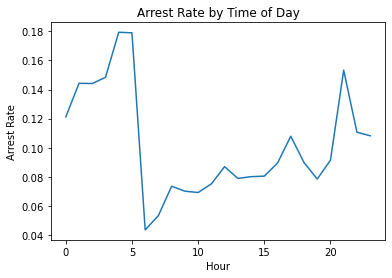

In [77]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt 

# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot()

# Add the xlabel, ylabel, and title
plt.xlabel("Hour")
plt.ylabel("Arrest Rate")
plt.title('Arrest Rate by Time of Day')

# Display the plot
plt.show()

#### INSIGHT:The arrest rate has a significant spike early in morning, and then dips after early morning hours.

Are drug related cases on rise?

In [78]:
df.drugs_related_stop.value_counts(dropna=False)

False    90879
True       862
Name: drugs_related_stop, dtype: int64

In [79]:
ri=df

stop_date_time
2005-12-31    0.006390
2006-12-31    0.006913
2007-12-31    0.007520
2008-12-31    0.006998
2009-12-31    0.009079
2010-12-31    0.009407
2011-12-31    0.009035
2012-12-31    0.009388
2013-12-31    0.012283
2014-12-31    0.013280
2015-12-31    0.011787
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


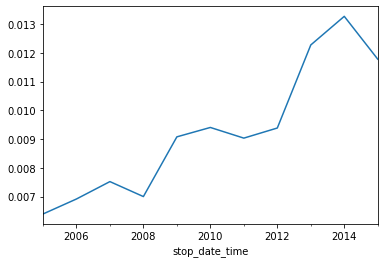

In [80]:
# Calculate the annual rate of drug-related stops
print(ri.drugs_related_stop.resample('A').mean())

# Save the annual rate of drug-related stops
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()

# Create a line plot of 'annual_drug_rate'
annual_drug_rate.plot()

# Display the plot
plt.show()

#### INSIGHT: The rate of drug-related stops nearly doubled over the course of 10 years. Why might that be the case?

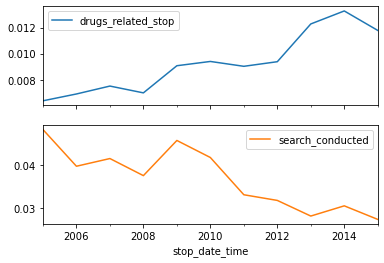

In [81]:
# Calculate and save the annual search rate
annual_search_rate = ri.search_conducted.resample('A').mean()

# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate, annual_search_rate], axis='columns')

# Create subplots from 'annual'
annual.plot(subplots=True)

# Display the subplots
plt.show()

#### INSIGHT:  The rate of drug-related stops increased even though the search rate decreased, disproving our hypothesis.

What violations are caught in each dstrict?

In [91]:
# Create a frequency table of districts and violations
print(pd.crosstab(ri.district, ri.violation))

# Save the frequency table as 'all_zones'
all_zones = pd.crosstab(ri.district, ri.violation)

# Select rows 'Zone K1' through 'Zone K3'
print(all_zones.loc['Zone K1':'Zone K3'])

# Save the smaller table as 'k_zones'
k_zones = all_zones.loc['Zone K1':'Zone K3']
ri.shape

violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1          673              1254    290                  120          0   
Zone K2         2061              2962    942                  768        481   
Zone K3         2302              2898    706                  695        638   
Zone X1          296               671    143                   38         74   
Zone X3         2049              3086    769                  671        820   
Zone X4         3541              5353   1560                 1411        843   

violation  Speeding  
district             
Zone K1        5960  
Zone K2       10448  
Zone K3       12323  
Zone X1        1119  
Zone X3        8779  
Zone X4        9795  
violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1      

(91741, 16)

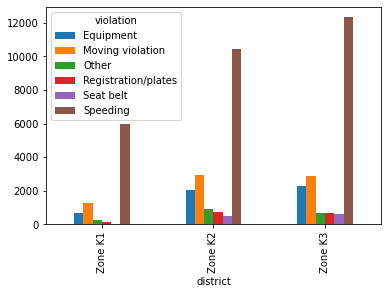

In [92]:
# Create a bar plot of 'k_zones'
k_zones.plot(kind="bar")

# Display the plot
plt.show()

#### INSIGHT: The vast majority of traffic stops in Zone K1 are for speeding, and Zones K2 and K3 are remarkably similar to one another in terms of violations.

In [82]:
ri.columns

Index(['state', 'stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type',
       'stop_outcome', 'is_arrested', 'stop_duration', 'drugs_related_stop',
       'district', 'frisk'],
      dtype='object')

How long might you be stopped for a violation?

In [83]:
# Print the unique values in 'stop_duration'
print(ri.stop_duration.unique())

# Create a dictionary that maps strings to integers
mapping = {'0-15 Min': 8, '16-30 Min' :23, '30+ Min': 45, '2':2, '1':1}

# Convert the 'stop_duration' strings to integers using the 'mapping'
ri['stop_minutes'] = ri.stop_duration.map(mapping)

# Print the unique values in 'stop_minutes'
print(ri.stop_minutes.unique())

['0-15 Min' '16-30 Min' nan '30+ Min']
[ 8. 23. nan 45.]


In [84]:
ri.stop_minutes.isnull().sum()

5202

violation_raw
APB                                 17.967033
Call for Service                    22.140805
Equipment/Inspection Violation      11.445340
Motorist Assist/Courtesy            17.741463
Other Traffic Violation             13.844490
Registration Violation              13.736970
Seatbelt Violation                   9.662815
Special Detail/Directed Patrol      15.123632
Speeding                            10.581509
Suspicious Person                   14.910714
Violation of City/Town Ordinance    13.254144
Warrant                             24.055556
Name: stop_minutes, dtype: float64


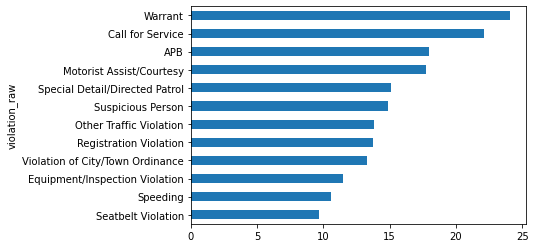

In [85]:
# Calculate the mean 'stop_minutes' for each value in 'violation_raw'
print(ri.groupby('violation_raw').stop_minutes.mean())

# Save the resulting Series as 'stop_length'
stop_length = ri.groupby('violation_raw').stop_minutes.mean()

# Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values().plot(kind="barh")

# Display the plot
plt.show()

How often searches were done after each violation type.

In [86]:
search_rate=df.groupby('violation').search_conducted.mean()
search_rate

violation
Equipment              0.064274
Moving violation       0.057014
Other                  0.045351
Registration/plates    0.093438
Seat belt              0.031513
Speeding               0.021560
Name: search_conducted, dtype: float64

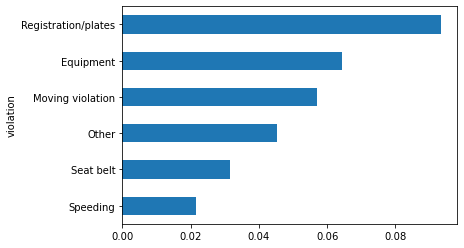

In [87]:
search_rate.sort_values().plot(kind="barh")
plt.show()

In [88]:
ri.head()

,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,frisk,stop_minutes
stop_date_time,,,,,,,,,,,,,,,,
2005-01-04 12:55:00,RI,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,8.0
2005-01-23 23:15:00,RI,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,False,8.0
2005-02-17 04:15:00,RI,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,8.0
2005-02-20 17:15:00,RI,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,False,23.0
2005-02-24 01:20:00,RI,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,False,8.0


In [89]:
ri.to_csv('ri.csv')